<a href="https://colab.research.google.com/github/mradzikowska/mbcs-internship/blob/main/RSA_TRIAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. IMPORTS & DATA**

In [31]:
#@title Imports
import numpy as np
import pandas as pd
from scipy import stats 
from scipy import corrcoef
from scipy.spatial.distance import cosine, euclidean, pdist, squareform
from sklearn.metrics import pairwise_distances
from scipy.stats import spearmanr




In [2]:
#@title Random Data creation
data_one = np.random.rand(10,50)
data_two = np.random.rand (10,50)
data_three = np.random.rand (10,50)
data_four = np.random.randint (20, size = (10,100))
data_five = np.random.randint (20, size = (10,100))

mock_data = [data_one, data_two, data_three]
mock_data_two = np.random.randint (20, size = (10,100))
mock_data_three = [data_one, mock_data_two]
mock_data_four = [data_one, data_two, data_three, mock_data_two]
mock_data_2 = [mock_data_two,data_four,data_five]

In [ ]:
#@title Inspect data
n_conditions = data_one.shape [0]
n_measurements_p_condition = data_one.shape [1]
n_samples = len(mock_data)

print ('Mock data simulates', n_measurements_p_condition, 'measurements for', n_conditions, 'conditions for', n_samples, 'subjects')

Mock data simulates 50 measurements for 10 conditions for 3 subjects


**2.REPRESENTATIONAL SIMILARITY ANALYSIS**

In [3]:
def dot_product_rsa(reps1, reps2):
  """Compute representational similarity between two sets of representations.

  Args:
    reps1: float array; [num_examples, feature_size1]
    reps2: float array; [num_examples, feature_size2]
  """
  assert reps1.shape[0] == reps2.shape[0], 'First dimensions of inputs should match.'

  # Normalize input representations #Cosine similarity = dot product for normalized vectors
  reps1 = reps1 / np.linalg.norm(reps1, axis=-1)[...,None]
  reps2 = reps2 / np.linalg.norm(reps2, axis=-1)[...,None]

  # Compute and normalize similarity matrices:
  similarities1 = reps1.dot(reps1.T) # instead of dot product you can use any similarity measure
  similarities2 = reps2.dot(reps2.T)
  similarities1 = similarities1 / np.linalg.norm(similarities1, axis=-1)[...,None]
  similarities2 = similarities2 / np.linalg.norm(similarities2, axis=-1)[...,None]

  # Here you can do pearson-r instead of this (or again any measure of similarity).
  similarity_of_similarity = np.sum(similarities1 * similarities2, axis=-1)
  return np.mean(similarity_of_similarity)

In [4]:
def dot_product_rsa_for_lists_of_reps(reps):
  """Compute representational similarity between two sets of representations.

  Args:
    reps: list of float arrays; List of arrrays with shape [num_examples, feature_size]
      (feature size can be different for each item in the list).
  """
  norm_reps = []
  for rep in reps:
  # Normalize input representations
    norm_reps.append(rep / np.linalg.norm(rep, axis=-1)[...,None])

  # Compute and normalize similarity matrices:
  similarity_matrices = []
  for rep in norm_reps:
    similarities = rep.dot(rep.T) # instead of dot product you can use any similarity measure
    similarities = similarities / np.linalg.norm(similarities, axis=-1)[...,None]
    similarity_matrices.append(similarities)

  # Shape of similarity_matrices: [num_of_rep_spaces, num_examples, num_examples]
  similarity_matrices = np.asarray(similarity_matrices) 
  sim_of_sim_mat = np.zeros((similarity_matrices.shape[0], 
                              similarity_matrices.shape[0]))
  for i in np.arange(sim_of_sim_mat.shape[0]):
    for j in np.arange(sim_of_sim_mat.shape[1]):
      # Here you can do pearson-r instead of this (or again any measure of similarity).
      similarity_of_similarity = np.sum(
          similarity_matrices[i] * similarity_matrices[j], axis=-1)
      similarity_score = np.mean(similarity_of_similarity)
      sim_of_sim_mat[i][j] = similarity_score
  return sim_of_sim_mat

In [5]:
def pearson_rsa(reps1, reps2):
  """Compute representational similarity between two sets of representations.

  Args:
    reps1: float array; [num_examples, feature_size1]
    reps2: float array; [num_examples, feature_size2]
  """
  assert reps1.shape[0] == reps2.shape[0], 'First dimensions of inputs should match.'

  # Normalize input representations
  reps1 = reps1 / np.linalg.norm(reps1, axis=-1)[...,None]
  reps2 = reps2 / np.linalg.norm(reps2, axis=-1)[...,None]

  # Compute and normalize similarity matrices:
  similarities1 = reps1.dot(reps1.T) # instead of dot product you can use any similarity measure
  similarities2 = reps2.dot(reps2.T)
  similarities1 = similarities1 / np.linalg.norm(similarities1, axis=-1)[...,None]
  similarities2 = similarities2 / np.linalg.norm(similarities2, axis=-1)[...,None]

  # Here you can do pearson-r instead of this (or again any measure of similarity).
  correlation_of_similarities = [stats.pearsonr(x,y)[0] for x,y in zip(similarities1,similarities2)]
  return np.mean(correlation_of_similarities)

In [6]:
def pearson_rsa_for_lists_of_reps(reps):
  """Compute representational similarity between two sets of representations.

  Args:
    reps: list of float arrays; List of arrrays with shape [num_examples, feature_size]
      (feature size can be different for each item in the list).
  """
  norm_reps = []
  for rep in reps:
  # Normalize input representations
    norm_reps.append(rep / np.linalg.norm(rep, axis=-1)[...,None])

  # Compute and normalize similarity matrices:
  similarity_matrices = []
  for rep in norm_reps:
    similarities = rep.dot(rep.T) # instead of dot product you can use any similarity measure
    similarities = similarities / np.linalg.norm(similarities, axis=-1)[...,None]
    similarity_matrices.append(similarities)

  # Shape of similarity_matrices: [num_of_rep_spaces, num_examples, num_examples]
  similarity_matrices = np.asarray(similarity_matrices) 
  sim_of_sim_mat = np.zeros((similarity_matrices.shape[0], 
                              similarity_matrices.shape[0]))
  for i in np.arange(sim_of_sim_mat.shape[0]):
    for j in np.arange(sim_of_sim_mat.shape[1]):
      # Here you can do pearson-r instead of this (or again any measure of similarity).
      correlation_of_similarities = [stats.pearsonr (a,b) [0] for a, b in zip (similarity_matrices [i], similarity_matrices [j])]
      similarity_score = np.mean(correlation_of_similarities)
      sim_of_sim_mat[i][j] = similarity_score
  return sim_of_sim_mat

In [ ]:
dot_product_rsa (data_one, data_one)

1.0

In [ ]:
dot_product_rsa (data_one, data_two)

0.9981748252202494

In [ ]:
pearson_rsa (data_one, data_one)

1.0

In [ ]:
pearson_rsa (data_one, data_two)

0.8616580349063098

In [ ]:
dot_product_rsa_for_lists_of_reps (mock_data)

array([[1.        , 0.99817483, 0.99755296],
       [0.99817483, 1.        , 0.99829537],
       [0.99755296, 0.99829537, 1.        ]])

In [ ]:
pearson_rsa_for_lists_of_reps (mock_data)

array([[1.        , 0.86165803, 0.80178295],
       [0.86165803, 1.        , 0.85881318],
       [0.80178295, 0.85881318, 1.        ]])

In [ ]:
dot_product_rsa_for_lists_of_reps (mock_data_three)

array([[1.        , 0.99818164],
       [0.99818164, 1.        ]])

In [ ]:
pearson_rsa_for_lists_of_reps (mock_data_three)

array([[1.        , 0.85644449],
       [0.85644449, 1.        ]])

**Visualization**

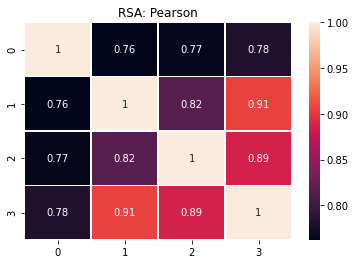

In [7]:
import seaborn as sns
import matplotlib.pylab as plt
ax = sns.heatmap(pearson_rsa_for_lists_of_reps (mock_data_four), linewidth=0.5, annot = True)
ax.set_title('RSA: Pearson')
plt.show()

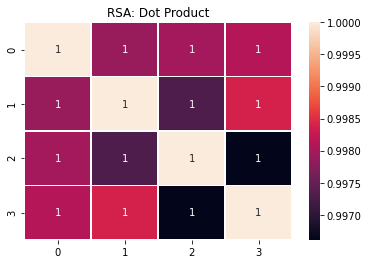

In [ ]:
ax = sns.heatmap(dot_product_rsa_for_lists_of_reps (mock_data_four), linewidth=0.5, annot = True)
ax.set_title('RSA: Dot Product')
plt.show()

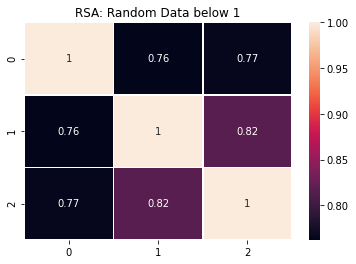

In [12]:
ax = sns.heatmap(pearson_rsa_for_lists_of_reps (mock_data), linewidth=0.5, annot = True)
ax.set_title('RSA: Random Data below 1')
plt.show()

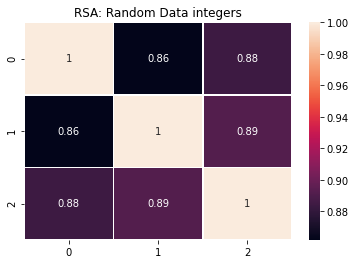

In [13]:
ax = sns.heatmap(pearson_rsa_for_lists_of_reps (mock_data_2), linewidth=0.5, annot = True)
ax.set_title('RSA: Random Data integers')
plt.show()

In [15]:
random_matrix_int = pearson_rsa_for_lists_of_reps (mock_data_2)
random_matric_dec = pearson_rsa_for_lists_of_reps (mock_data)

**SIGNIFICANCE TESTING**

In [41]:
matrix_plot1 = True
matrix_plot2 = False
bar_plot = False
correlations1 = False
correlations2 = False
pvalues = False
no_relabelings = 10000
dist_metric = 1
output_first = True
output_second = False
scale_to_max = False



def get_pvalue(matrix1, matrix2):
    """ Randomize condition labels to test significance """

    order = list(range(0,len(matrix2)))
    dist = np.zeros(no_relabelings)

    # First, determine actual correlation
    flat1 = matrix1.flatten().transpose()
    flat2 = matrix2.flatten().transpose()
    corr = spearmanr(flat1,flat2)[0]

    # Relabel N times to obtain distribution of correlations
    for i in range(0,no_relabelings):
        np.random.shuffle(order)
        dummy = matrix2.take(order, axis=1).take(order, axis=0)
        flat2 = dummy.flatten().transpose()
        dist[i] = spearmanr(flat1,flat2)[0]

    # Determine p value of actual correlation from distribution
    p = float((dist >= corr).sum()) / len(dist)

    # Mit dieser Methode braucht man mindestens 4 conditions, also 4!=24 mögliche
    # Reihenfolgen um auf p < 0.05 zu kommen. Nicht gut!

    return p

def bootstrap(data):
    """ computes the variability of the obtained second-order RDM (i.e. distance
    between areas, models, ...) for the same experiment with different stimuli
    by bootstrapping 100 times from the condition set. """

    all_RDMs = list()

    # Iterate through 100 resamplings
    for ind in range(100):
        index = np.random.random_integers(0, high=len(data[0].T)-1, size=(1,len(data[0].T)))[0]
        new_data = np.array(data)
        # Reorder columns in data (conditions)
        for elem in range(len(data)):
            new_data[elem] = new_data[elem][:,index]
        # Recompute first and second-order RDMs with new conditions
        new_RDM1 = first_order_rdm(list(new_data))
        new_RDM2 = second_order_rdm(new_RDM1, data, False)[0]
        # Remove off-diagonal zeros to avoid artefactually small standard deviations
        m_index = [new_RDM2 == 0]
        ident = np.invert(np.identity(len(new_RDM2), dtype=bool))
        m_index = m_index & ident
        new_RDM2[m_index[0]] = np.nan

        all_RDMs.append(new_RDM2)

    all_RDMs = np.array(all_RDMs)

    # Compute standard deviation along first dimension (across RDMs)
    variability = np.nanstd(all_RDMs,0)

In [42]:
get_pvalue(random_matrix_int, random_matric_dec)

0.1671